# Tabular Kaggle Project

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, May 3rd 1:30 pm. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/sites/Course_2242_data_3402_001-vUhPXzAGLgTnk/Shared%20Documents/General/TabularDatasets.xlsx?d=w17e157db75904dfcb03a78c84f10e2e6&csf=1&web=1&e=KHi7m9). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you should follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Provide Project link.
* Short paragraph describing the challenge.
* Briefly describe the data.


###**Santander Product Recommendation**

https://www.kaggle.com/competitions/santander-product-recommendation/data

The goal of this challenge is to guess which new products Santander bank customers will buy by June 28, 2016, compared to what they already had by May 28, 2016. Participants use past customer behavior data to make these predictions accurately. It's like trying to predict what someone might add to their shopping cart based on what they've bought before.

The data includes demographics, account status, and owned financial products. It tracks customer codes, age, sex, residence country, and product ownership, aiding analysis of customer behavior and preferences.

## Data Loading and Initial Look

* Load the data.
* Count the number of rows (data points) and features.
* Any missing values?
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values?
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

In [2]:
### Loading Dataset

In [3]:
!pip install -q kaggle

In [22]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [24]:
!chmod 600 ~/.kaggle/kaggle.json

In [25]:
!kaggle datasets list

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                         1MB  2024-04-10 09:48:38          11124        235  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                     2MB  2024-04-29 19:29:56            829         23  1.0              
priyamchoksi/bitcoin-historical-prices-and-activity-2010-2024    Bitcoin Historical Prices & Activity (2010-2024)  187KB  2024-04-26 13:01:20            565         23  1.0              
jaidalmotra/pokemon-dataset                                      

In [26]:
!kaggle competitions download -c santander-product-recommendation

 98% 223M/228M [00:02<00:00, 152MB/s]
100% 228M/228M [00:02<00:00, 100MB/s]


In [27]:
!mkdir santander-product-recommendation

mkdir: cannot create directory ‘santander-product-recommendation’: File exists


In [28]:
!unzip santander-product-recommendation.zip -d train

Archive:  santander-product-recommendation.zip
  inflating: train/sample_submission.csv.zip  
  inflating: train/test_ver2.csv.zip  
  inflating: train/train_ver2.csv.zip  


In [29]:
!unzip train/sample_submission.csv.zip -d train

Archive:  train/sample_submission.csv.zip
  inflating: train/sample_submission.csv  


In [30]:
!unzip train/test_ver2.csv.zip -d train

Archive:  train/test_ver2.csv.zip
  inflating: train/test_ver2.csv     


In [31]:
!unzip train/train_ver2.csv.zip -d train

Archive:  train/train_ver2.csv.zip
  inflating: train/train_ver2.csv    


In [32]:
!ls

kaggle.json  santander-product-recommendation	   train
sample_data  santander-product-recommendation.zip


In [33]:
### Rows and Columns

In [34]:
file_paths = ["sample_submission.csv", "test_ver2.csv", "train_ver2.csv"]

In [35]:
!head -5 "sample_submission.csv"

head: cannot open 'sample_submission.csv' for reading: No such file or directory


In [36]:
!head -5 "test_ver2.csv"

head: cannot open 'test_ver2.csv' for reading: No such file or directory


In [37]:
!head -5 "train_ver2.csv"

head: cannot open 'train_ver2.csv' for reading: No such file or directory


In [38]:
## file takes a long time to run maybe cuz of size

#df=pd.read_csv('train_ver2.csv')
#df.info()

In [40]:
df = pd.read_csv('/content/train/train_ver2.csv', nrows=700000)

# Display the first few rows of the dataframe
print(df.head())


<ipython-input-40-78c63513e4b1>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/train/train_ver2.csv', nrows=700000)


   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  ind_plan_fin_ult1  \
0        0.0          6     1.0  ...                0                  0   
1        0.0         35     1.0  ...                0                  0   
2        0.0         35     1.0  ...                0                  0   
3        0.0         35     1.0  ...                0                  0   
4        0.0         35     1.0  ...                0                  0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin_ult1 

In [42]:
total_rows, total_columns = df.shape

missing_values = df.isnull().sum()

print("Total Rows:", total_rows)
print("Total Features:", total_columns)
print("Number of Missing Values:")
print(missing_values)


Total Rows: 700000
Total Features: 48
Number of Missing Values:
fecha_dato                    0
ncodpers                      0
ind_empleado               7790
pais_residencia            7790
sexo                       7792
age                           0
fecha_alta                 7790
ind_nuevo                  7790
antiguedad                    0
indrel                     7790
ult_fec_cli_1t           699184
indrel_1mes                7790
tiprel_1mes                7790
indresi                    7790
indext                     7790
conyuemp                 699911
canal_entrada              7844
indfall                    7790
tipodom                    7790
cod_prov                  12343
nomprov                   12343
ind_actividad_cliente      7790
renta                    123987
segmento                   7868
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju

In [43]:
### There are 1869815 missing values in the test_ver2.csv
### 31261901 missing values in the train_ver2.csv dataset

In [44]:
## Features

In [45]:
categorical_columns = []
numerical_columns = []

# Loop through each column and determine its data type
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

# Print the categorical and numerical columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'antiguedad', 'ult_fec_cli_1t', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'nomprov', 'segmento']
Numerical Columns: ['ncodpers', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


In [46]:
dataset_name = 'train50'

# Initialize an empty dataframe to store feature information
feature_info = pd.DataFrame(columns=['Dataset', 'Feature', 'Type', 'Values'])

# Function to get feature information for a dataset
def get_feature_info(df, dataset_name):
    dataset = df.head()

    # Iterate over each column in the dataset
    for column in dataset.columns:
        values = dataset[column].unique()  # Get unique values
        if dataset[column].dtype == 'object':
            feature_info.loc[len(feature_info)] = [dataset_name, column, 'Categorical', ", ".join(map(str, values))]
        else:
            feature_info.loc[len(feature_info)] = [dataset_name, column, 'Numerical', f"Range: [{values.min()}, {values.max()}]"]

# Get feature information for the dataset
get_feature_info(df, dataset_name)

# Output the feature information table
print(feature_info)


    Dataset                Feature         Type  \
0   train50             fecha_dato  Categorical   
1   train50               ncodpers    Numerical   
2   train50           ind_empleado  Categorical   
3   train50        pais_residencia  Categorical   
4   train50                   sexo  Categorical   
5   train50                    age  Categorical   
6   train50             fecha_alta  Categorical   
7   train50              ind_nuevo    Numerical   
8   train50             antiguedad  Categorical   
9   train50                 indrel    Numerical   
10  train50         ult_fec_cli_1t  Categorical   
11  train50            indrel_1mes    Numerical   
12  train50            tiprel_1mes  Categorical   
13  train50                indresi  Categorical   
14  train50                 indext  Categorical   
15  train50               conyuemp  Categorical   
16  train50          canal_entrada  Categorical   
17  train50                indfall  Categorical   
18  train50                tipo

 In sample_submission, we see ncodpers, a number with a small range, and added_products, hinting at possible new purchases. In test_ver2, there are features like fecha_dato, probably dates, and ncodpers, used as an ID. Also, ind_empleado is a category showing job status. In train_ver2, most features seem to be numbers, likely with mostly zeros

In [47]:
missing_threshold = 0.1 # aka 10% missing values

# Filter columns with significant missing values and convert to numeric
columns_with_missing = df.columns[df.isnull().mean() > missing_threshold]
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_with_missing = [col for col in columns_with_missing if col in numeric_columns]

# Impute missing values with median
df[columns_with_missing] = df[columns_with_missing].fillna(df[columns_with_missing].median())
print(df.isnull().sum())

fecha_dato                    0
ncodpers                      0
ind_empleado               7790
pais_residencia            7790
sexo                       7792
age                           0
fecha_alta                 7790
ind_nuevo                  7790
antiguedad                    0
indrel                     7790
ult_fec_cli_1t           699184
indrel_1mes                7790
tiprel_1mes                7790
indresi                    7790
indext                     7790
conyuemp                 699911
canal_entrada              7844
indfall                    7790
tipodom                    7790
cod_prov                  12343
nomprov                   12343
ind_actividad_cliente      7790
renta                         0
segmento                   7868
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

In [48]:
# Determine numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print the identified numerical and categorical columns
print("Numerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
print(categorical_cols)

Numerical columns:
Index(['ncodpers', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tipodom', 'cod_prov',
       'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

Categorical columns:
Index(['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age',
       'fecha_alta', 'antiguedad', 'ult_fec_cli_1t', 'tiprel_1mes', 'indresi',
       'indext', 'conyuemp', 'canal_entrada', 'indfall', 'nomprov',
       'segmento'],
      dtype='object')


In [49]:
### Possible Outliers

In [50]:
#identify number of outliers in each numerical column
num_cols=df.select_dtypes(include=['int', 'float']).columns
df_num=df[num_cols]
for col in df_num.columns:
   q1=df_num[col].quantile(0.25)
   q3=df_num[col].quantile(0.75)
   IQR=q3-q1
   outliers=df_num[((df_num[col]<(q1-1.5*IQR)) | (df_num[col]>(q3+1.5*IQR)))]
   print(f'{col} outlier count: {outliers.value_counts().sum()}')


ncodpers outlier count: 0
ind_nuevo outlier count: 193
indrel outlier count: 814
indrel_1mes outlier count: 25
tipodom outlier count: 0
cod_prov outlier count: 0
ind_actividad_cliente outlier count: 0
renta outlier count: 54331
ind_ahor_fin_ult1 outlier count: 112
ind_aval_fin_ult1 outlier count: 21
ind_cco_fin_ult1 outlier count: 156206
ind_cder_fin_ult1 outlier count: 381
ind_cno_fin_ult1 outlier count: 66919
ind_ctju_fin_ult1 outlier count: 10095
ind_ctma_fin_ult1 outlier count: 8502
ind_ctop_fin_ult1 outlier count: 131307
ind_ctpp_fin_ult1 outlier count: 40967
ind_deco_fin_ult1 outlier count: 1519
ind_deme_fin_ult1 outlier count: 1944
ind_dela_fin_ult1 outlier count: 41348
ind_ecue_fin_ult1 outlier count: 68064
ind_fond_fin_ult1 outlier count: 15628
ind_hip_fin_ult1 outlier count: 6074
ind_plan_fin_ult1 outlier count: 8301
ind_pres_fin_ult1 outlier count: 2667
ind_reca_fin_ult1 outlier count: 43261
ind_tjcr_fin_ult1 outlier count: 41063
ind_valo_fin_ult1 outlier count: 22837
ind_vi

In [51]:
### went through column description, and made a subset of only those

In [52]:
### issue I am seeing is that some categorical columns should be numerical... might drop them

### numerical ones should be:

 # age: Age of the customer,
 # antiguedad: Customer seniority in months,
# renta: Gross income of the household.

In [53]:
### dataset is very big, w/ a lot of missing values so dropping them
## going through columns that are not needed:  ['pais_residencia', 'sexo', 'ult_fec_cli_1t', 'cod_prov', 'nomprov']

columns_to_drop = ['antiguedad','age']
df.drop(columns=columns_to_drop, inplace=True)


In [54]:
## kept getting 0 rows...
#subset_df = df.dropna()
#print(subset_df.head())

In [55]:
### doing iac and renta because cod_prov is just the address
# ind_actividad_cliente outliers with the most outliers and it relates to the activity in the bank of the person
##

In [56]:
## renta outliers
r_q1 = df_num['renta'].quantile(0.25)
r_q3 = df_num['renta'].quantile(0.75)
r_IQR = r_q3 - r_q1
r_outliers = df_num[((df_num['renta'] < (r_q1 - 1.5 * r_IQR)) | (df_num['renta'] > (r_q3 + 1.5 * r_IQR)))]
r_outliers


,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
6,1050616,0.0,1.0,1.0,1.0,24.0,0.0,295590.36,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
45,1050688,0.0,1.0,1.0,1.0,28.0,1.0,245052.27,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
58,1050632,0.0,1.0,1.0,1.0,8.0,0.0,289211.40,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
158,1050884,0.0,1.0,1.0,1.0,28.0,0.0,323722.50,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
161,1050888,0.0,1.0,1.0,1.0,28.0,1.0,243690.57,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699926,483129,0.0,1.0,1.0,1.0,28.0,0.0,262902.57,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
699928,483127,0.0,1.0,1.0,1.0,28.0,0.0,414695.70,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
699930,483121,0.0,1.0,1.0,1.0,15.0,0.0,339275.01,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
699965,483391,0.0,1.0,1.0,1.0,28.0,0.0,312235.56,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [57]:
r_outliers.describe()

,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,5.433900e+04,54339.000000,54339.0,54339.000000,54339.0,54339.000000,54339.000000,5.433900e+04,54339.000000,54339.000000,...,54339.000000,54339.000000,54339.000000,54339.000000,54339.000000,54339.000000,54339.000000,54331.000000,54331.000000,54339.000000
mean,5.947905e+05,0.000221,1.0,1.000221,1.0,25.658606,0.618451,4.166718e+05,0.000313,0.000074,...,0.009109,0.024918,0.002080,0.109167,0.086715,0.063730,0.010600,0.077065,0.089323,0.192458
std,3.828298e+05,0.014859,0.0,0.021015,0.0,9.229837,0.485771,6.564874e+05,0.017685,0.008580,...,0.095009,0.155876,0.045555,0.311851,0.281419,0.244273,0.102411,0.266696,0.285212,0.394235
min,1.588900e+04,0.000000,1.0,1.000000,1.0,2.000000,0.000000,2.427631e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.755150e+05,0.000000,1.0,1.000000,1.0,28.000000,0.000000,2.723238e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.266110e+05,0.000000,1.0,1.000000,1.0,28.000000,1.000000,3.187518e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.274470e+05,0.000000,1.0,1.000000,1.0,28.000000,1.000000,4.115035e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.379021e+06,1.000000,1.0,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The output shows really high income values in the 'renta' column... maybe cuz of the currency but it doesn't relly matter because it is all the same country aka Spain, so same scale?
The majority of customers fall within a moderate income range (average value of 'renta' is approximately 416,672.)

In [58]:
# Describe the "renta" column
renta_description = df['renta'].describe()

# Print the description
print(renta_description)


count    7.000000e+05
mean     1.302275e+05
std      2.056468e+05
min      1.202730e+03
25%      7.659021e+04
50%      1.039558e+05
75%      1.430575e+05
max      2.889440e+07
Name: renta, dtype: float64


1. **Average Income**: The average income is approximately €130,227.
2. **Stability**: Most incomes fall within the range of €76,590.21 to €143,057.5, suggesting relatively stable income levels.
3. **No Extreme Values**: There are no extremely high or low incomes, indicating consistency in the data.

## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression:
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

In [59]:
target_columns = ['ind_nuevo','ind_actividad_cliente', 'renta']

target_df = df[target_columns]

# Now target_df contains only the columns representing product purchases,
# which you can use as your target variables for classification.


In [60]:
dataset_name = "train2"

classification_datasets = list()
regression_datasets = list()
binary_classification_datasets = list()
multiclass_classification_datasets = list()
dataset_summary = dict()

n_train = df.shape[0]

# Check for missing values
any_null = df.isnull().values.any()

target_columns = ['ind_nuevo','ind_actividad_cliente', 'renta']
num_cat_total = 0
num_not_cat_total = 0


# Iterate over each target column
for target_column in target_columns:
    # Check number of unique targets
    n_unique = len(df[target_column].unique())

    # Check if target type is float
    a_value = df[target_column].to_numpy()[0]
    float_check = isinstance(a_value, np.float64)

    # Check categorical columns
    num_cat = len(categorical_cols)
    num_not_cat = len(numerical_cols)

    # Determine task type based on target
    binary_classification = n_unique == 2
    multiclass_classification = n_unique < n_train / 10 and not binary_classification
    regression = not binary_classification and not multiclass_classification

    # Assess task type and categorize dataset accordingly
    if binary_classification:
        binary_classification_datasets.append(dataset_name)
        classification_datasets.append(dataset_name)

    if multiclass_classification:
        multiclass_classification_datasets.append(dataset_name)
        classification_datasets.append(dataset_name)

    if regression:
        regression_datasets.append(dataset_name)

    # Update total counts of categorical and numerical columns
    num_cat_total += num_cat
    num_not_cat_total += num_not_cat

# Calculate n_features directly from df
n_features = df.shape[1]

# Store dataset summary
dataset_summary[dataset_name] = [dataset_name, binary_classification, multiclass_classification, regression, n_train, any_null, n_features, num_cat_total, num_not_cat_total]


In [65]:
dataset_summary # of features do not add up...

{'train2': ['train2', False, False, True, 700000, True, 46, 48, 96]}

Dataset is better with regression, has 700,000 samples and still has missing values

In [61]:
print (len(binary_classification_datasets))
print (len(multiclass_classification_datasets))
print (len(regression_datasets))

0
2
1


No datasets suitable for binary classification, two for multiclass classification, and one for regression.

In [75]:
# New customer Index. 1 if the customer registered in the last 6 months.
mapping_dict = {'0': 'No', '1': 'Yes'}

# Apply mapping to the column
df['ind_nuevo'] = df['ind_nuevo'].map(mapping_dict)

print(df['ind_nuevo'].unique())

[nan]


In [76]:
# Check for missing values in the transformed column
print(df['ind_nuevo'].isnull().sum())

700000


In [ ]:
### missing all check other columns

In [80]:
# Define a mapping dictionary
activity_mapping = {1: 'Active customer', 0: 'Inactive customer'}

# Replace values in the column using the mapping dictionary
df['ind_actividad_cliente'] = df['ind_actividad_cliente'].map(activity_mapping)
print(df['ind_actividad_cliente'])
print(df['ind_actividad_cliente'].isnull().sum())

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
699995    NaN
699996    NaN
699997    NaN
699998    NaN
699999    NaN
Name: ind_actividad_cliente, Length: 700000, dtype: object
700000


In [82]:
print(df['renta'])
print(df['renta'].isnull().sum())

0          87218.10
1          35548.74
2         122179.11
3         119775.54
4         103955.79
            ...    
699995    105370.29
699996    141146.91
699997    166119.75
699998    199135.95
699999    103955.79
Name: renta, Length: 700000, dtype: float64
0


In [83]:
## i'll only use renta since it has no missing values too

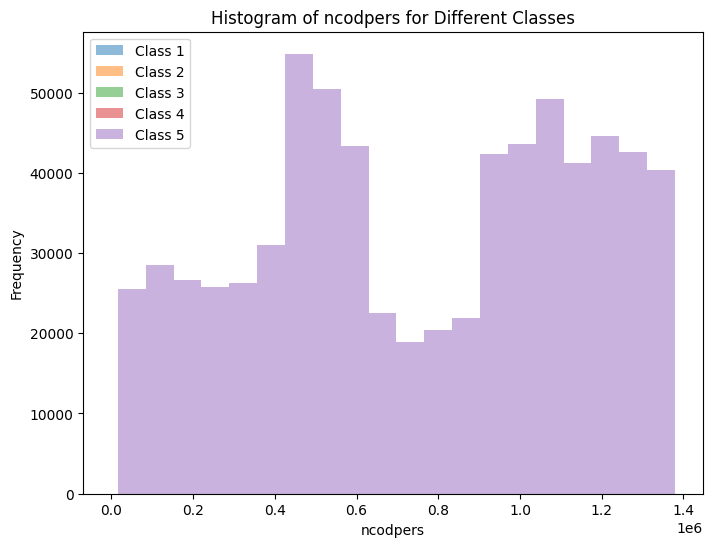

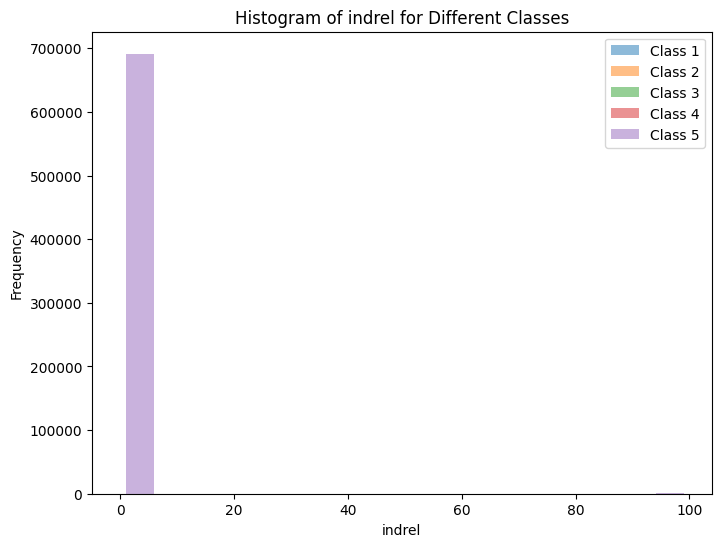

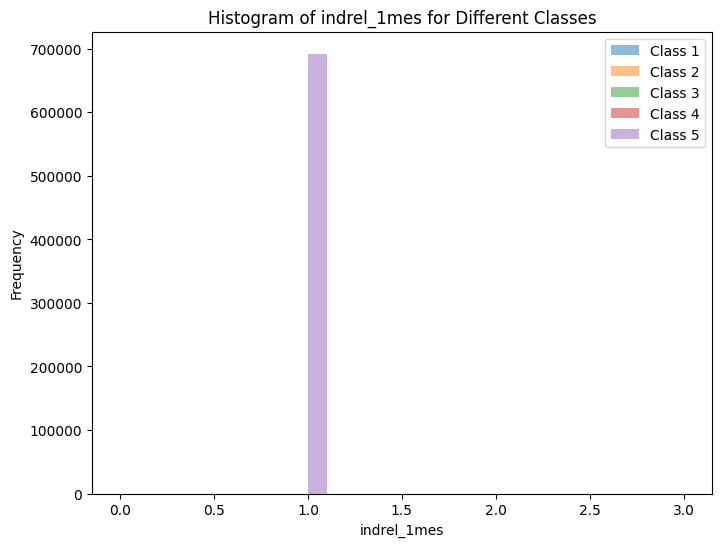

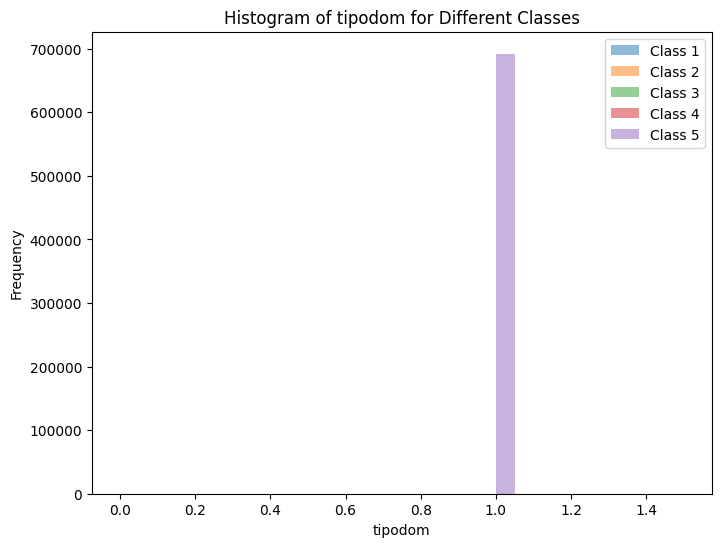

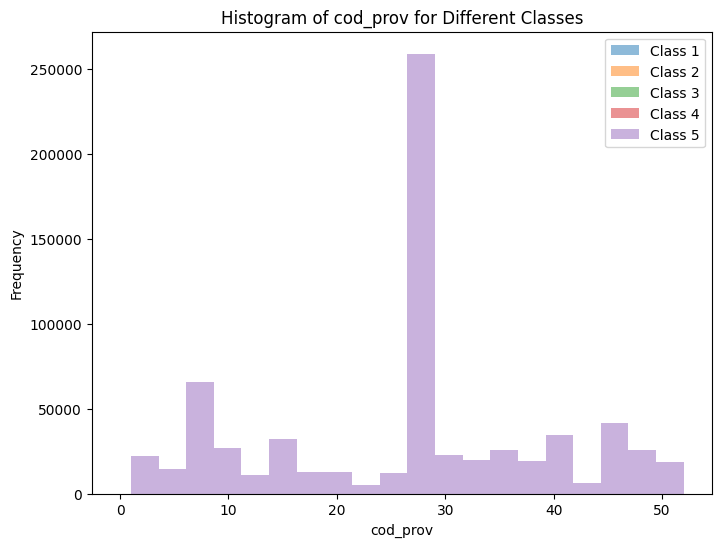

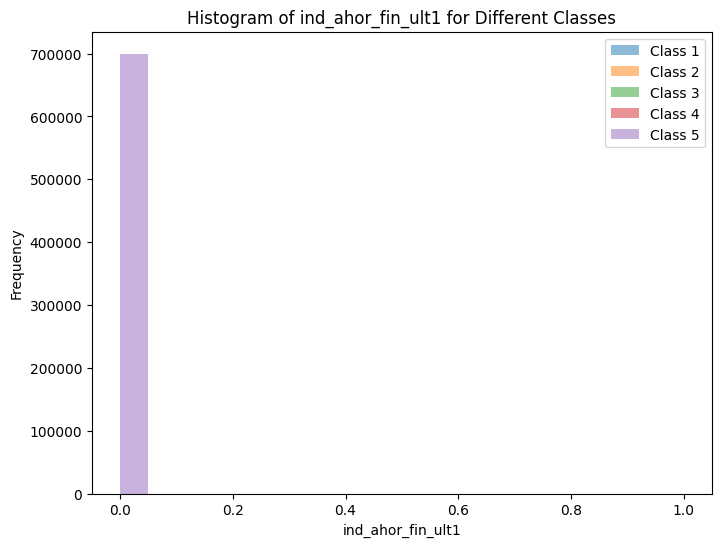

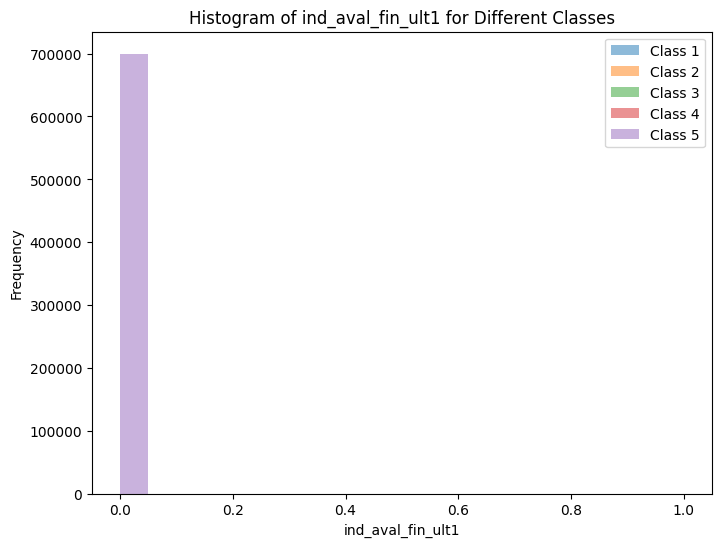

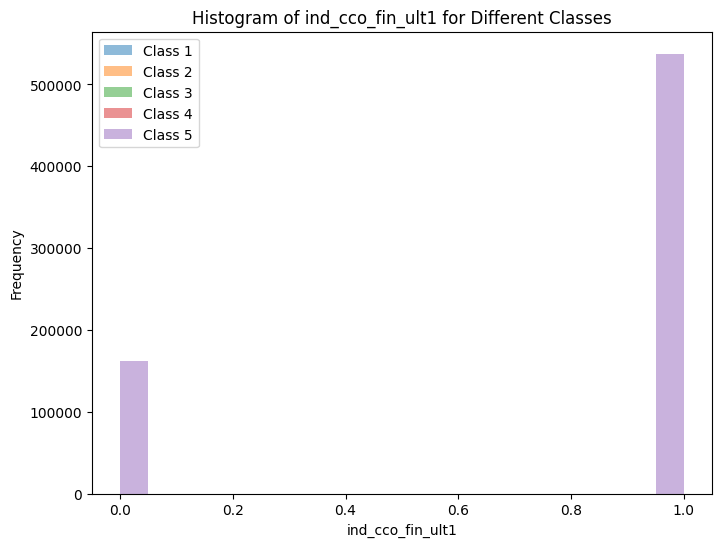

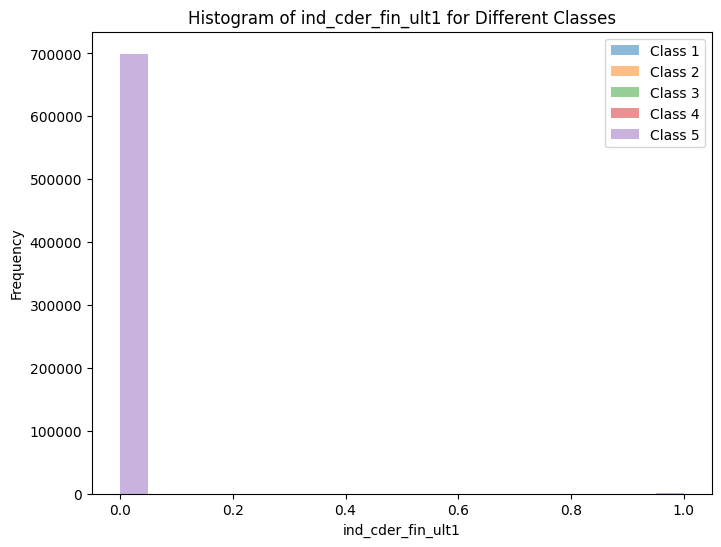

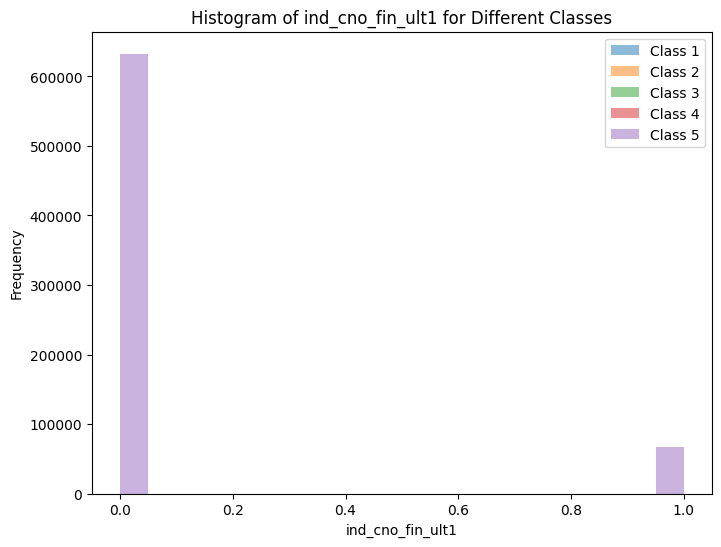

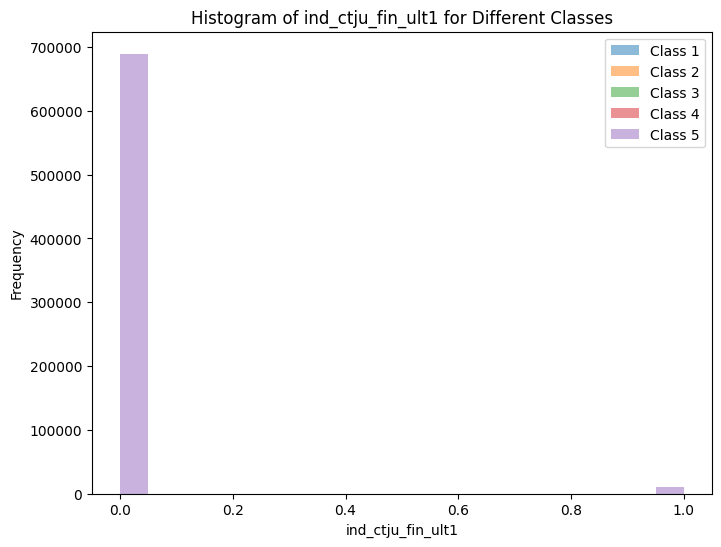

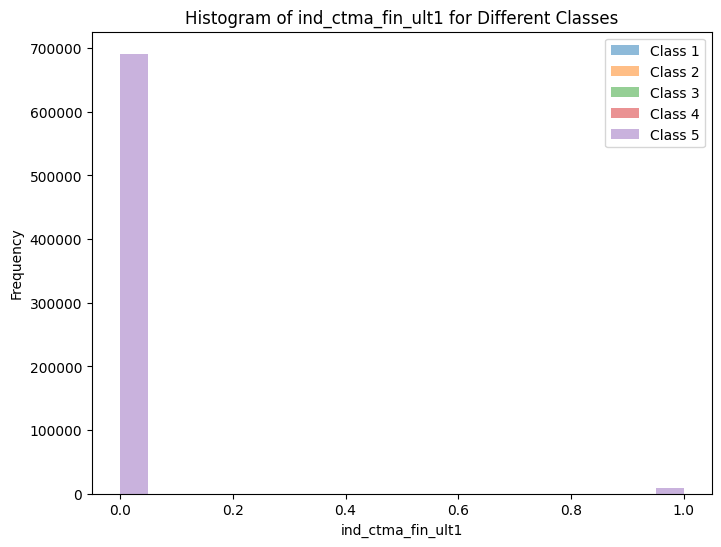

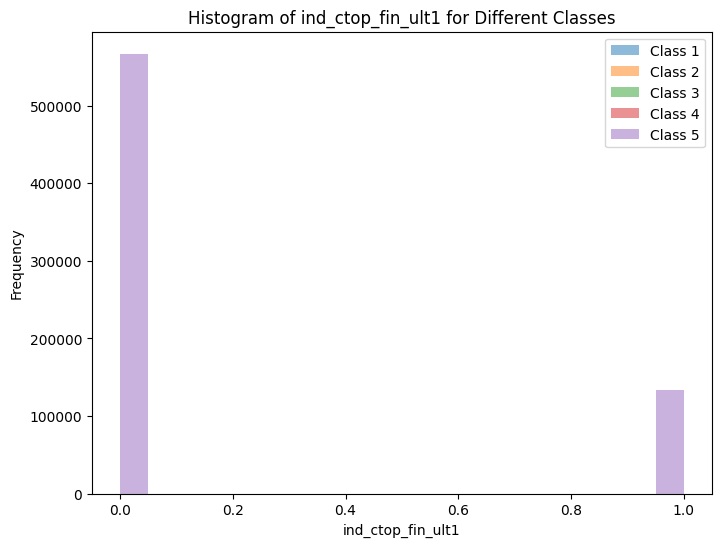

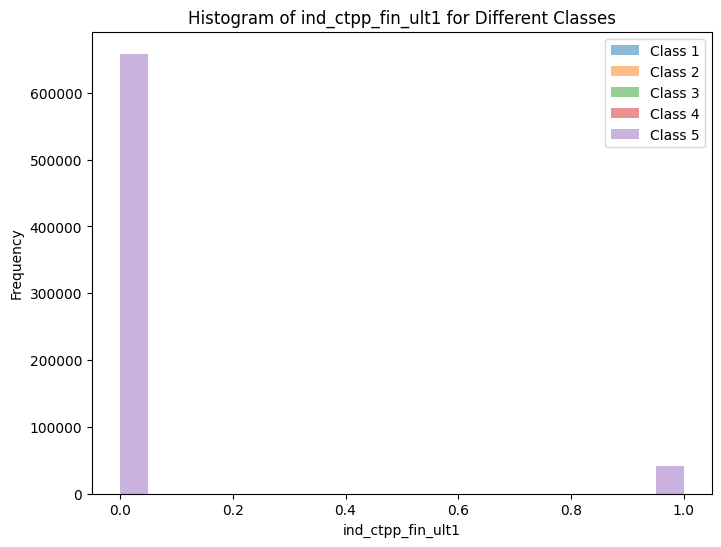

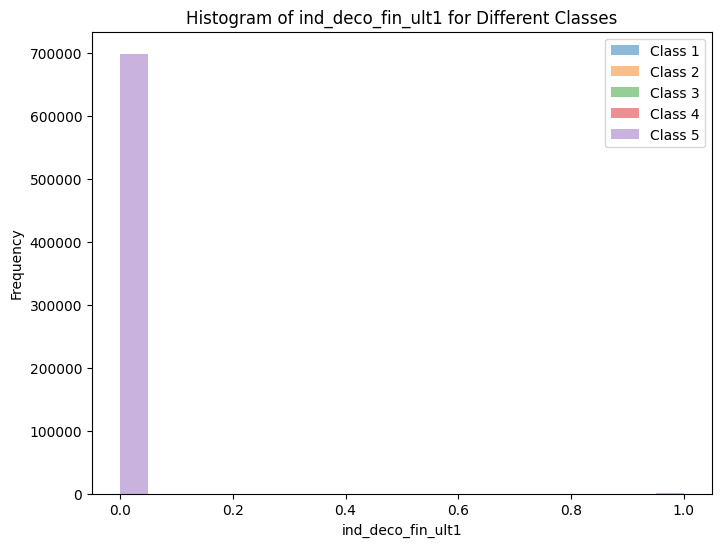

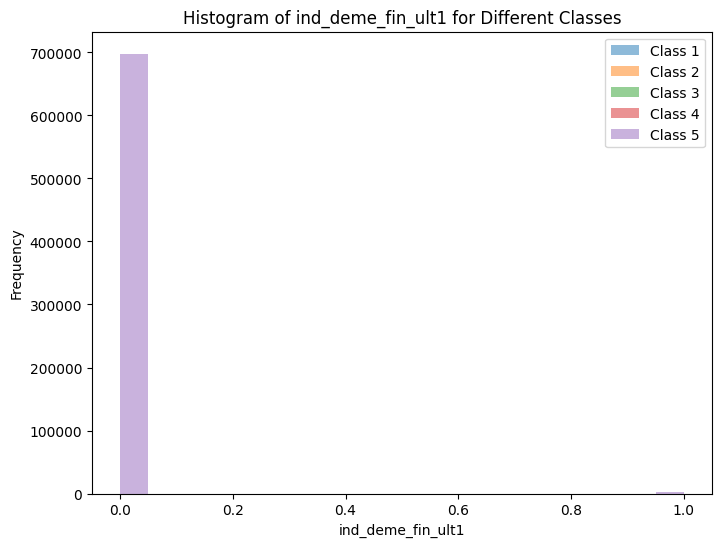

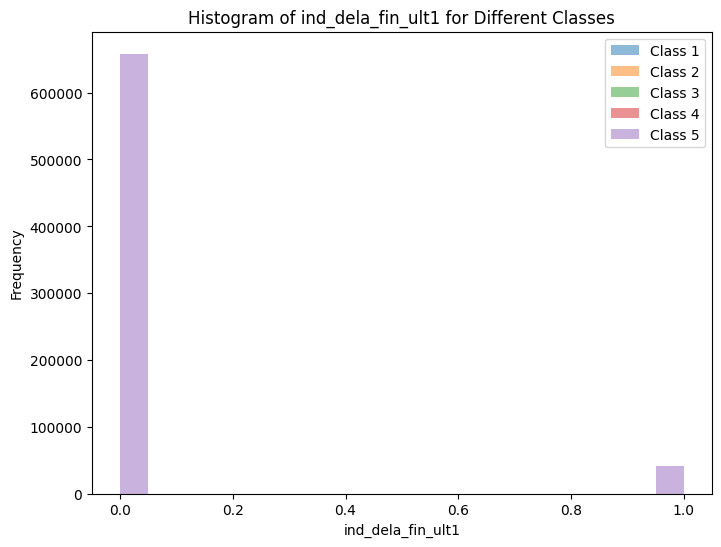

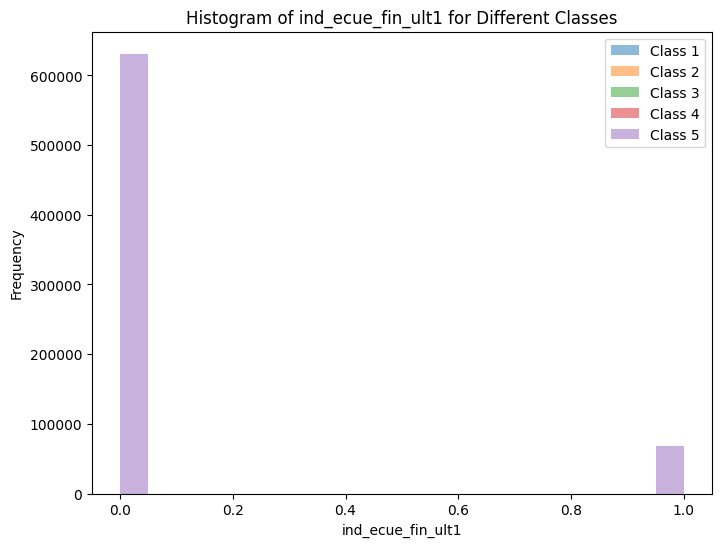

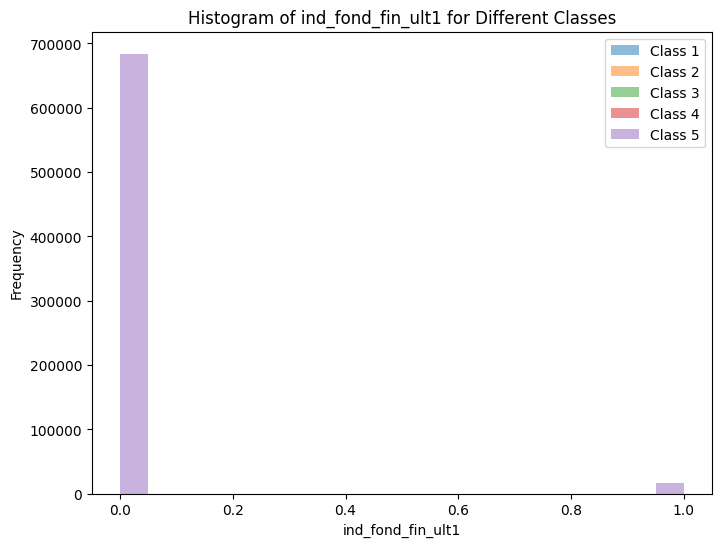

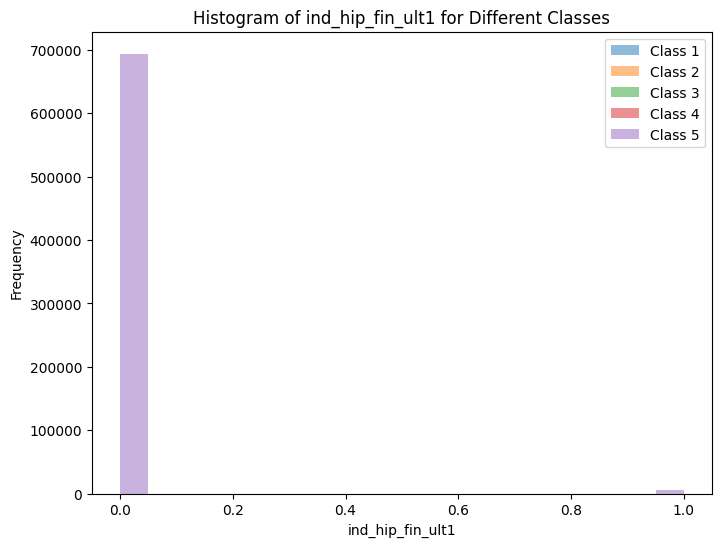

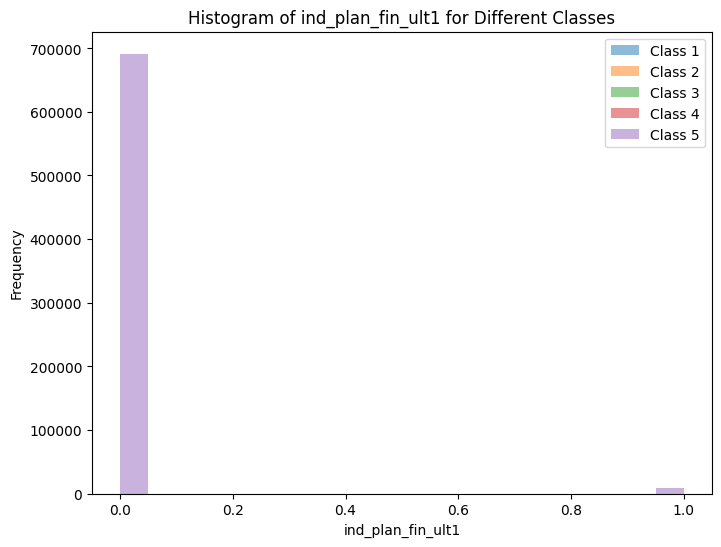

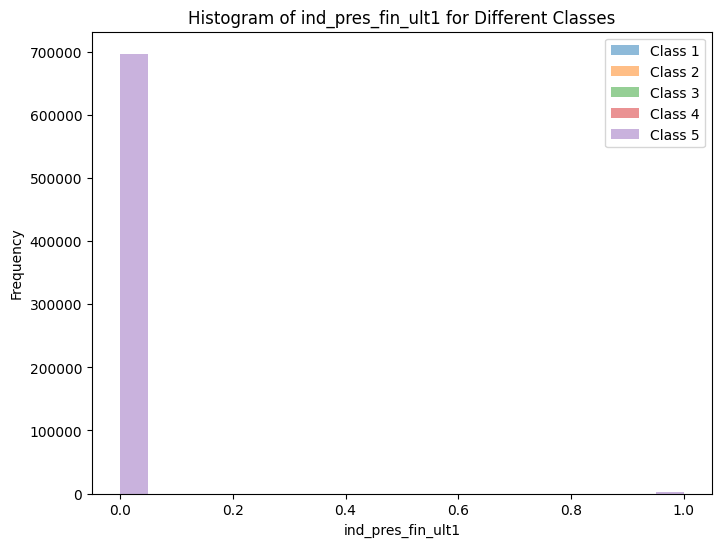

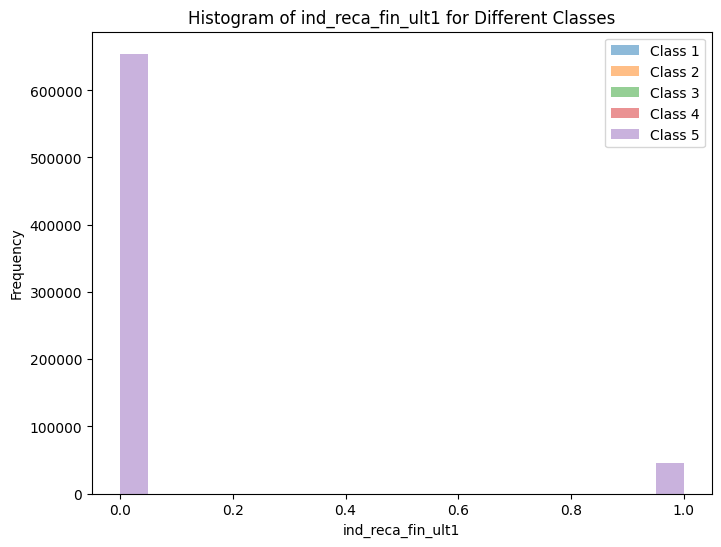

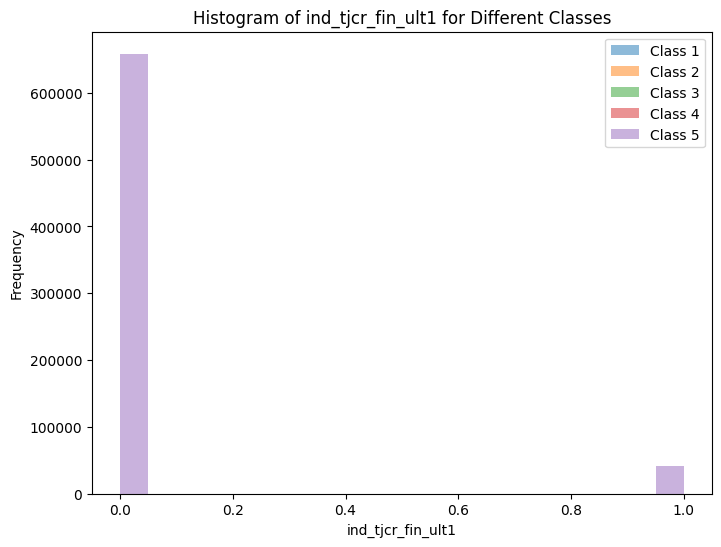

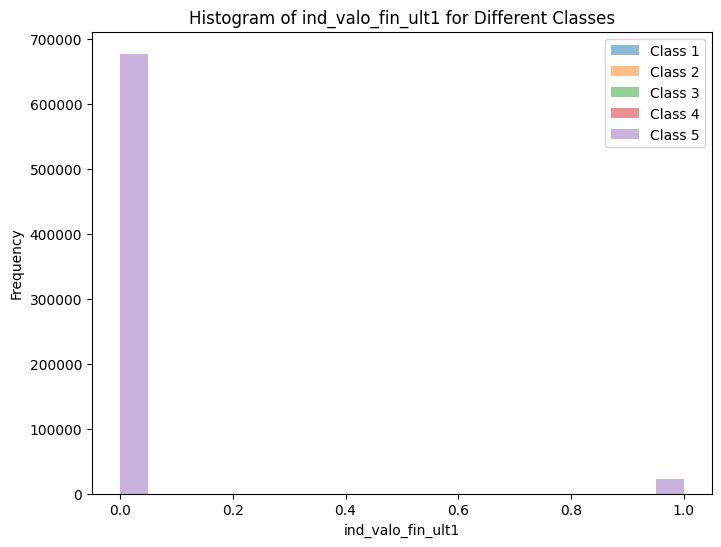

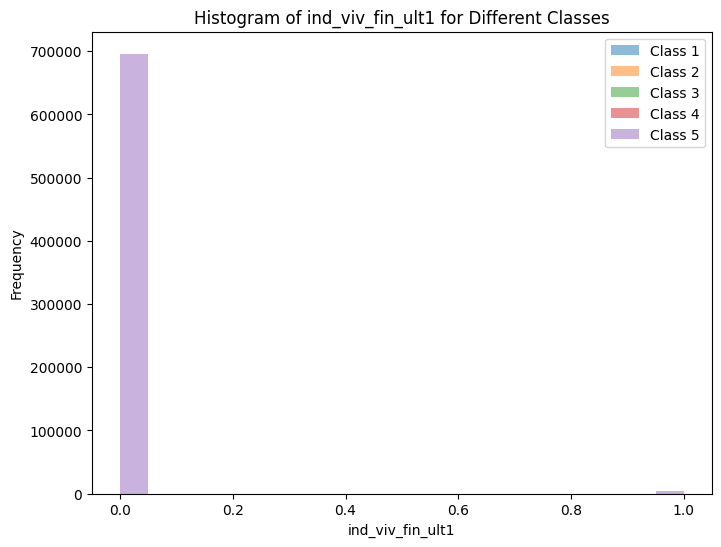

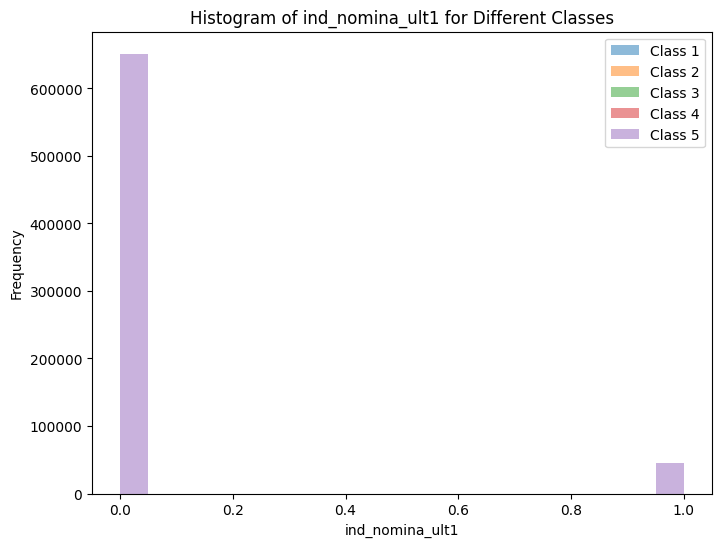

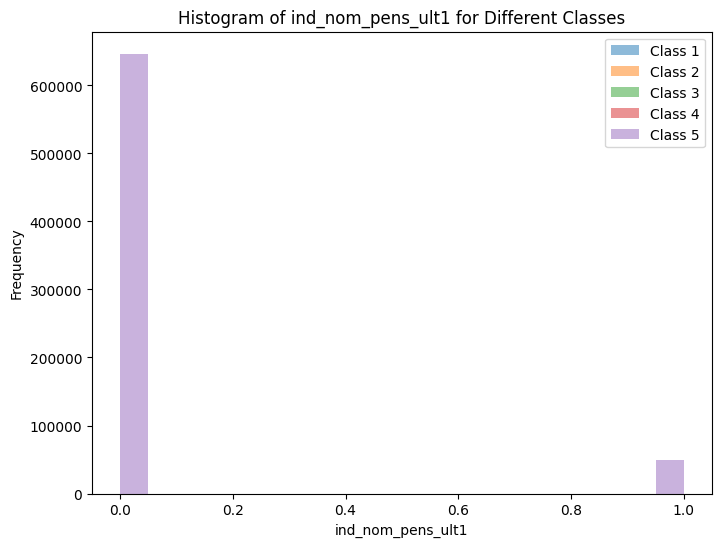

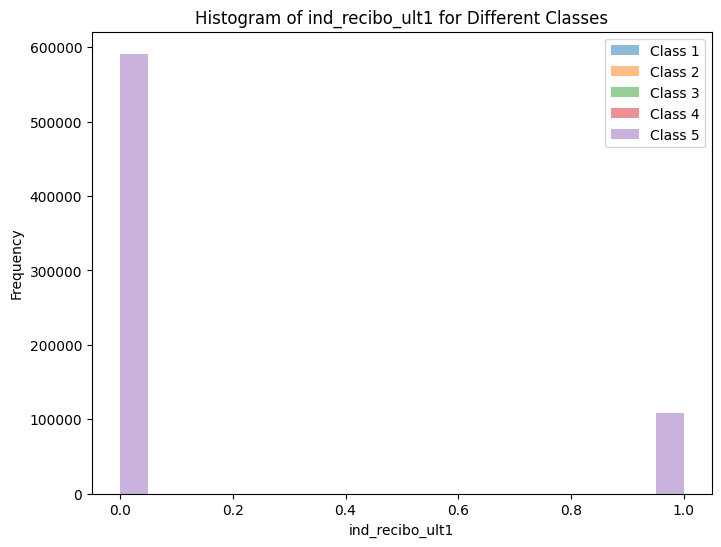

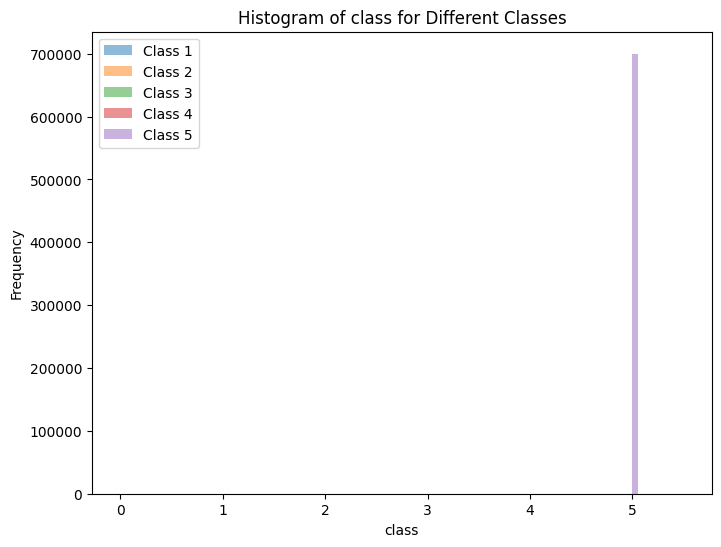

In [85]:
target_column = 'renta'

# Define the class intervals for regression
class_intervals = [(0.0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1.0)]

# Divide the target variable into classes based on the intervals
def assign_class(value):
    for i, interval in enumerate(class_intervals):
        if interval[0] <= value < interval[1]:
            return i + 1
    return len(class_intervals) + 1

# Assign classes to the target variable
df['class'] = df[target_column].apply(assign_class)

# Compare histograms of features between classes
for feature in df.columns:
    if feature != target_column and df[feature].dtype != 'object':
        plt.figure(figsize=(8, 6))
        for class_num in range(1, len(class_intervals) + 2):
            plt.hist(df[df['class'] == class_num][feature], alpha=0.5, label=f'Class {class_num}', bins=20)
        plt.title(f'Histogram of {feature} for Different Classes')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# Make comments on promising features
# Based on the histograms, features with distinct distributions across different classes are promising for the regression task.


In [ ]:
##ncodpers has the most correlation but it is just the customers code...

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature.
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [ ]:
### used the columns that showed a correlation baseed on the histograms and the description they had

## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [90]:
selected_columns = ['indrel_1mes', 'ind_ecue_fin_ult1', 'ind_ctop_fin_ult1', 'ind_nomina_ult1', 'ind_cco_fin_ult1', 'renta']
df_selected = df[selected_columns].copy()  #fix RAM issue
# Drop rows with missing values
df_selected.dropna(inplace=True)

# Remove duplicated rows if any
df_selected.drop_duplicates(inplace=True)

# Train-test split
X = df_selected.drop(columns=['renta'])
y = df_selected['renta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model on validation set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")

Mean Squared Error on Validation Set: 39952508565.53505


The (MSE) is very high for the target variable...
Most likely due to the way I handled missings values (risked bias or data loss).
Dealing with missing data and misclassified numerical features posed challenges in modeling. Misinterpreting numerical as categorical variables distorted relationships.


Some ways I can improve:

*   Check the impact of the different techniques to the mean imputation using cross-validation for the nan values
*   Saw some numerical columns mistakened as categorical, so I was quick to drop them (avoid misclassification). One-hot encoding for "categorical variables" that were supposed to be numerical



##Citations:

@misc{santander-product-recommendation,
    author = {Meg Risdal, Mercedes Piedra, Wendy Kan},
    title = {Santander Product Recommendation},
    publisher = {Kaggle},
    year = {2016},
    url = {https://kaggle.com/competitions/santander-product-recommendation}
}




"BLACKBOXAI. (2023). BLACKBOXAI: A World-Class AI Assistant. https://www.blackboxai.com/"